In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(3498, 11) (483, 9) (483, 3)


In [3]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

           id                                           SMILES     MLM  \
0  TRAIN_0000  CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC  26.010   
1  TRAIN_0001             Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1  29.270   
2  TRAIN_0002                 CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1   5.586   

      HLM  AlogP  Molecular_Weight  Num_H_Acceptors  Num_H_Donors  \
0  50.680  3.259           400.495                5             2   
1  50.590  2.169           301.407                2             1   
2  80.892  1.593           297.358                5             0   

   Num_RotatableBonds   LogD  Molecular_PolarSurfaceArea  
0                   8  3.259                      117.37  
1                   2  2.172                       73.47  
2                   3  1.585                       62.45  
         id                                             SMILES  AlogP  \
0  TEST_000            CC(C)Nc1ccnc(N2CCN(Cc3cccs3)C(CCO)C2)n1  2.641   
1  TEST_001     COc1cc(=O)n(-c2ccccc2)cc1C(=

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          3498 non-null   object 
 1   SMILES                      3498 non-null   object 
 2   MLM                         3498 non-null   float64
 3   HLM                         3498 non-null   float64
 4   AlogP                       3496 non-null   float64
 5   Molecular_Weight            3498 non-null   float64
 6   Num_H_Acceptors             3498 non-null   int64  
 7   Num_H_Donors                3498 non-null   int64  
 8   Num_RotatableBonds          3498 non-null   int64  
 9   LogD                        3498 non-null   float64
 10  Molecular_PolarSurfaceArea  3498 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 300.7+ KB


In [5]:
train.describe()

,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea
count,3498.000000,3498.000000,3496.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,37.384742,53.090206,2.841399,363.881846,4.016581,1.098628,4.561178,2.682156,79.747278
std,35.695993,36.080081,1.608073,79.527022,1.511091,0.976266,2.357243,1.666996,28.849229
min,0.000000,0.000000,-4.137000,172.180000,0.000000,0.000000,0.000000,-4.920000,3.240000
25%,2.433000,15.905500,1.833000,304.389750,3.000000,0.000000,3.000000,1.620000,60.150000
50%,26.193000,58.023000,2.889000,350.255000,4.000000,1.000000,4.000000,2.709000,77.525000
75%,70.807250,87.753000,3.958250,409.744750,5.000000,2.000000,6.000000,3.860000,96.540000
max,131.720000,135.336000,9.190000,1360.467000,15.000000,10.000000,38.000000,9.190000,296.430000


In [6]:
train.isnull().sum()

id                            0
SMILES                        0
MLM                           0
HLM                           0
AlogP                         2
Molecular_Weight              0
Num_H_Acceptors               0
Num_H_Donors                  0
Num_RotatableBonds            0
LogD                          0
Molecular_PolarSurfaceArea    0
dtype: int64

In [7]:
train['AlogP'] = train['AlogP'].fillna(2.841399)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train[['HLM', 'MLM']])
df = scaler.transform(train[['HLM', 'MLM']])
df = pd.DataFrame(df)
df[0]

0      -0.066811
1      -0.069306
2       0.770668
3      -1.416225
4       1.300066
          ...   
3493   -1.386315
3494   -0.151357
3495   -1.422046
3496   -1.394880
3497   -1.398207
Name: 0, Length: 3498, dtype: float64

In [9]:
train['HLM_str'] = df[0]
train['MLM_str'] = df[1]
train

,id,SMILES,MLM,HLM,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,HLM_str,MLM_str
0,TRAIN_0000,CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC,26.010,50.680,3.259,400.495,5,2,8,3.259,117.37,-0.066811,-0.318702
1,TRAIN_0001,Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1,29.270,50.590,2.169,301.407,2,1,2,2.172,73.47,-0.069306,-0.227362
2,TRAIN_0002,CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1,5.586,80.892,1.593,297.358,5,0,3,1.585,62.45,0.770668,-0.890948
3,TRAIN_0003,Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...,5.710,2.000,4.771,494.652,6,0,5,3.475,92.60,-1.416225,-0.887474
4,TRAIN_0004,Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2,93.270,99.990,2.335,268.310,3,0,1,2.337,42.43,1.300066,1.565813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493,TRAIN_3493,Cn1nc(CNC(=O)Cn2nc(C(F)(F)F)c3c2CCC3)c(Cl)c1Cl,1.556,3.079,3.409,396.195,3,1,5,3.409,64.74,-1.386315,-1.003862
3494,TRAIN_3494,CCn1[nH]cc/c1=N\C(=O)c1nn(-c2ccccc2)c(=O)c2ccc...,35.560,47.630,1.912,359.381,4,1,3,1.844,77.37,-0.151357,-0.051126
3495,TRAIN_3495,CCOC(=O)CCCc1nc2cc(N)ccc2n1C,56.150,1.790,1.941,261.320,3,1,6,2.124,70.14,-1.422046,0.525772
3496,TRAIN_3496,Nc1cc(C(=O)OCCC2CCOC2=O)cnc1Cl,0.030,2.770,0.989,284.696,5,1,5,0.989,91.51,-1.394880,-1.046618


In [10]:
train = train.drop(['id', 'SMILES', 'MLM', 'HLM'], axis=1)
train

,AlogP,Molecular_Weight,Num_H_Acceptors,Num_H_Donors,Num_RotatableBonds,LogD,Molecular_PolarSurfaceArea,HLM_str,MLM_str
0,3.259,400.495,5,2,8,3.259,117.37,-0.066811,-0.318702
1,2.169,301.407,2,1,2,2.172,73.47,-0.069306,-0.227362
2,1.593,297.358,5,0,3,1.585,62.45,0.770668,-0.890948
3,4.771,494.652,6,0,5,3.475,92.60,-1.416225,-0.887474
4,2.335,268.310,3,0,1,2.337,42.43,1.300066,1.565813
...,...,...,...,...,...,...,...,...,...
3493,3.409,396.195,3,1,5,3.409,64.74,-1.386315,-1.003862
3494,1.912,359.381,4,1,3,1.844,77.37,-0.151357,-0.051126
3495,1.941,261.320,3,1,6,2.124,70.14,-1.422046,0.525772
3496,0.989,284.696,5,1,5,0.989,91.51,-1.394880,-1.046618


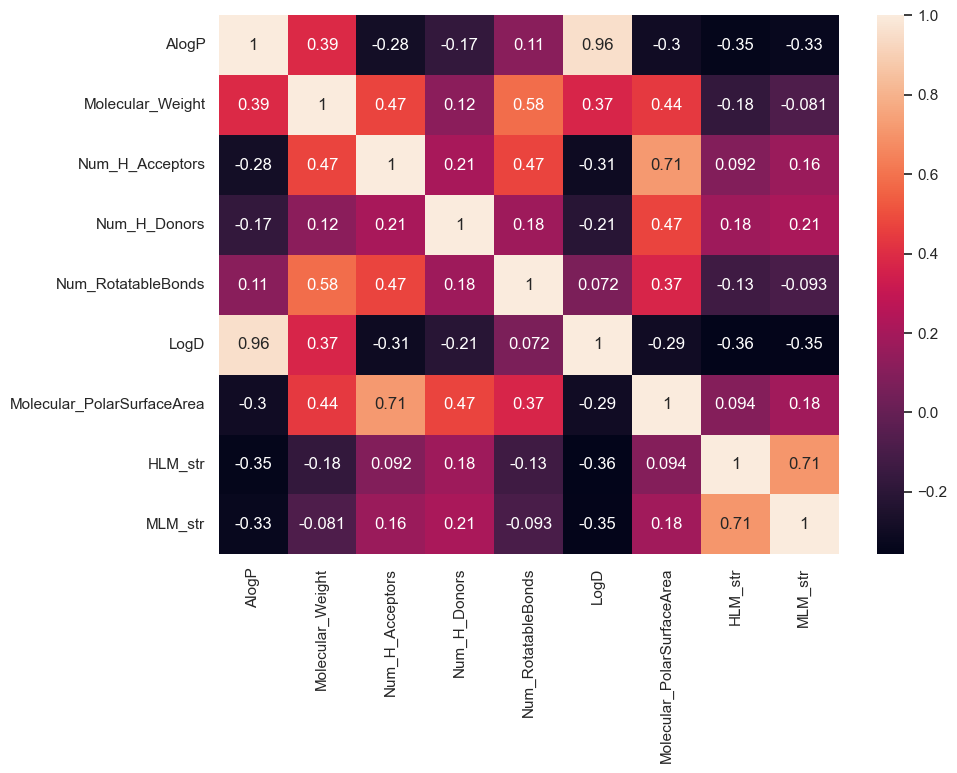

In [11]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.0)
sns.heatmap(train.corr(), annot=True, cbar=True)
plt.show()

In [12]:
# LogD, Num_H_Donors, AlogP
df = train[['MLM_str', 'LogD', 'AlogP', 'Num_H_Donors']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MLM_str       3498 non-null   float64
 1   LogD          3498 non-null   float64
 2   AlogP         3498 non-null   float64
 3   Num_H_Donors  3498 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 109.4 KB


In [13]:
plot_cols = ['MLM_str','LogD','AlogP', 'Num_H_Donors']
plot_df = df.loc[:, plot_cols]
# plot_df

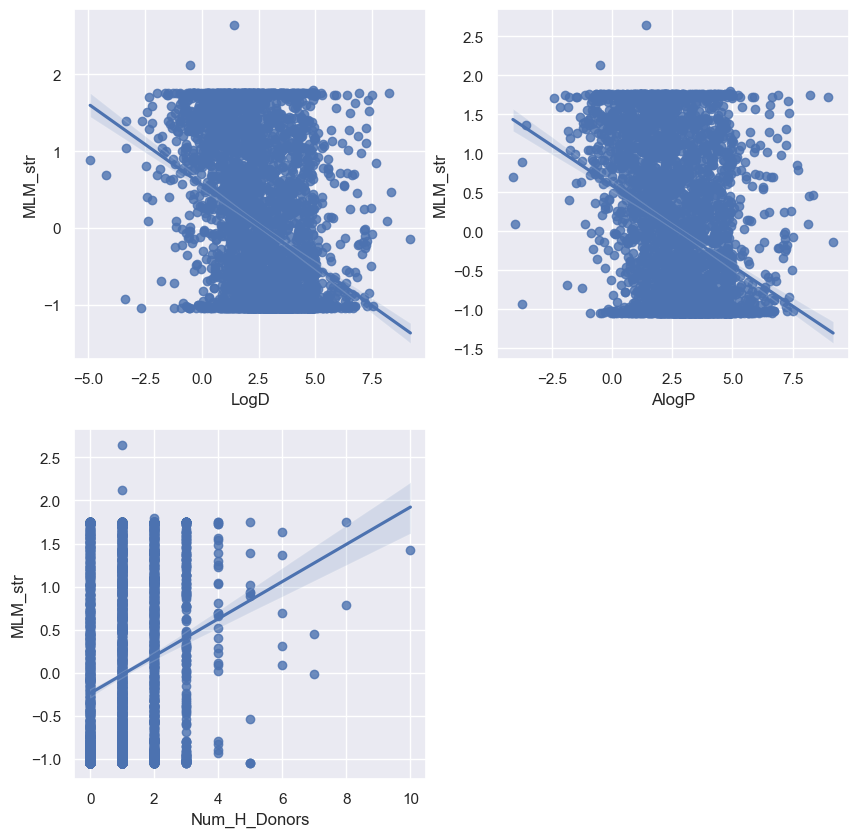

In [14]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    axl = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df, ax=axl)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X_data = df.loc[:,['LogD', 'AlogP', 'Num_H_Donors']]
y_data = df.loc[:, 'MLM_str']
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=12)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(2798, 3) (2798,)
(700, 3) (700,)


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

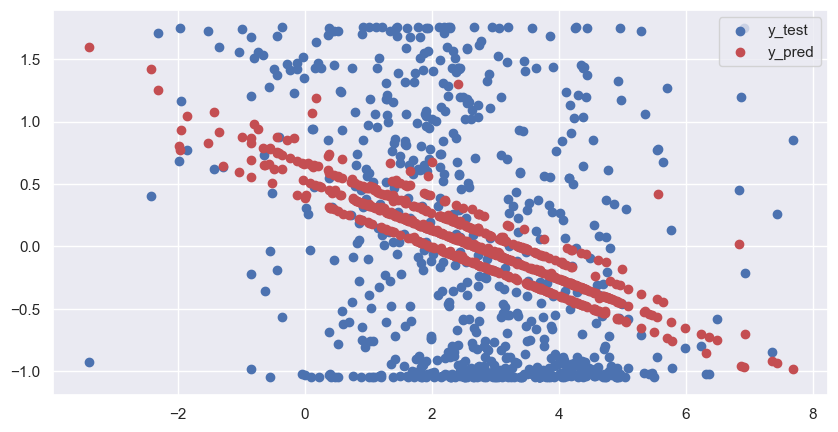

In [18]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['LogD'], y_test, label='y_test')
plt.scatter(x_test['LogD'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

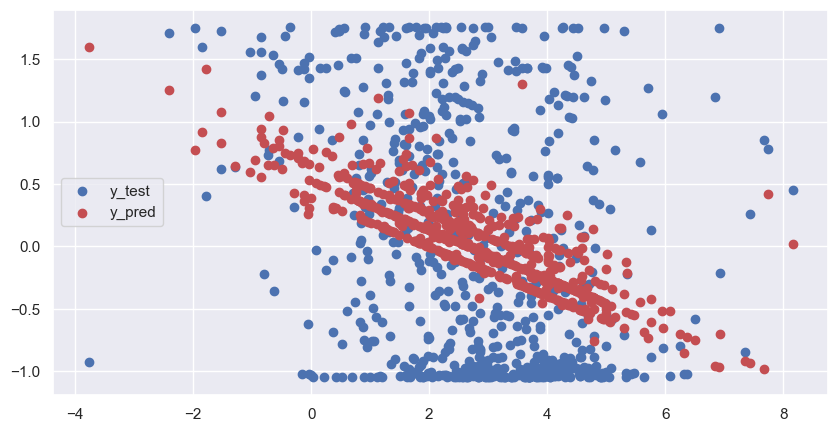

In [19]:
# 예측
y_test_pred = lr.predict(x_test)

# 예측값 실제값의 분포
plt.figure(figsize=(10,5)) # 그림또는 도표로 나타내기
plt.scatter(x_test['AlogP'], y_test, label='y_test')
plt.scatter(x_test['AlogP'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [ ]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(x_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %3f" % test_mse)

Train MSE:0.864513
Test MSE: 0.833075


In [ ]:
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
mse_score = -1*cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("개별 Fold의 MSE:", np.round(mse_score, 4))
print("평균 MSE:%4f" % np.mean(mse_score))

개별 Fold의 MSE: [0.827  0.8212 0.9017 0.8798 0.9077]
평균 MSE:0.867467


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
x_train_poly = pf.fit_transform(x_train)
print("원본 학습 데이터 셋:", x_train.shape) # 2개인 이유 LATST, RM 이 두가지 값을 가지기 때문이고
print("2차 다항식 변환 데이터 셋:", x_train_poly.shape)

원본 학습 데이터 셋: (2798, 3)
2차 다항식 변환 데이터 셋: (2798, 10)


In [ ]:
lr = LinearRegression()
lr.fit(x_train_poly, y_train) # y_train은 실제 결과값

# 테스트 데이터에 대한 예측 밒 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%3f" % train_mse)

x_test_poly = pf.fit_transform(x_test) # 학습한 예측결과랑 test값의 예측 결과 파악
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%3f" % test_mse)

Train MSE:0.831896
Test MSE:0.845478


In [ ]:
print(lr.predict(x_train_poly))

[ 0.0683817   0.06094579  0.8443738  ... -0.19183958 -0.31972064
 -0.44999771]


In [ ]:
# XGBoost
from xgboost import XGBRegressor
xgbr = XGBRegressor(objective='reg:squarederror', max_depth=3, random_state=12)
xgbr.fit(x_train, y_train)

y_train_pred = xgbr.predict(x_train)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE:%.4f" % train_mse)

y_test_pred = xgbr.predict(x_test)
text_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE:0.6261
Test MSE:0.8455


In [ ]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
x_train_poly = pf.fit_transform(x_train)

lr = LinearRegression()
lr.fit(x_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(x_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.3f" % train_mse)

x_test_poly = pf.fit_transform(x_test)
y_test_pred = lr.predict(x_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE:%.4f" % test_mse)

Train MSE: 0.702
Test MSE:9603255881666889728.0000


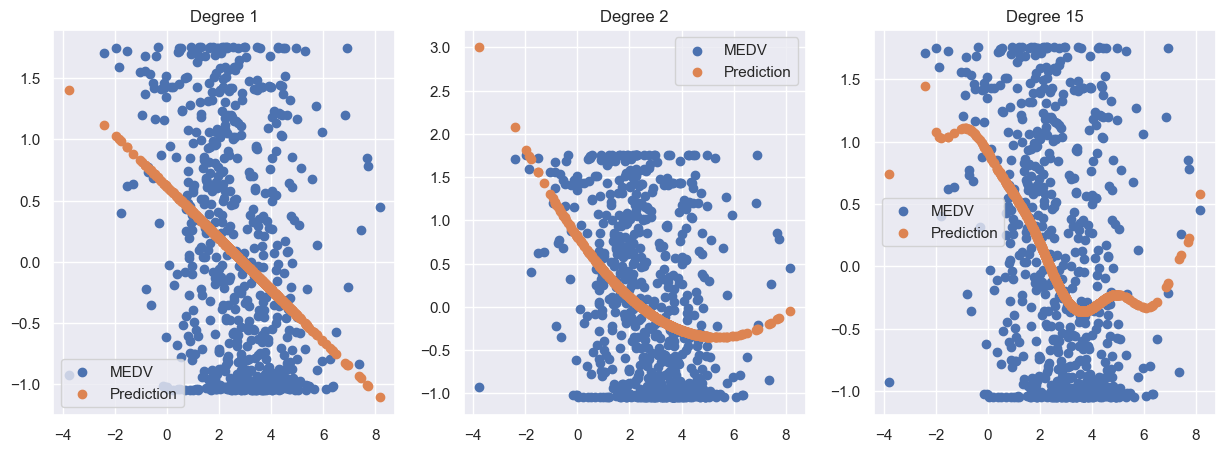

In [ ]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    axl = plt.subplot(1,3, n+1)
    # plt.axis('off')
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    x_train_poly = pf.fit_transform(x_train.loc[:,['AlogP']]) # 전채 행 선택후 열의 LSTAT선택 즉, RM제외
    x_test_poly = pf.fit_transform(x_test.loc[:, ['AlogP']])
    lr = LinearRegression()
    lr.fit(x_train_poly, y_train)
    y_test_pred = lr.predict(x_test_poly)
    # 실제값 분포
    plt.scatter(x_test.loc[:,['AlogP']], y_test, label='MEDV')
    # 예측값 분포
    plt.scatter(x_test.loc[:,['AlogP']], y_test_pred, label='Prediction')
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()
plt.show()